# Plotting scene temps

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import geopandas as gpd

/home/caprice/micromamba/envs/summerfog/lib/python3.12/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


files = sorted(glob.glob("*.nc"))
files

In [32]:
#file path
#fn = '2019-08-28T19:01:37.429983000.nc'
fn ='summer2024/2024-07-16T19:00:52.980989000.nc'

#fn = '2019-08-12T19:01:33.400679000.nc'

In [33]:
#open data set
ds = xr.open_dataset(fn)

In [40]:
ds

<xarray.Dataset> Size: 149MB
Dimensions:           (y: 1974, x: 1675)
Coordinates:
  * y                 (y) float64 16kB 5.42e+06 5.42e+06 ... 5.361e+06 5.361e+06
  * x                 (x) float64 13kB 4.75e+05 4.751e+05 ... 5.253e+05
    time              datetime64[ns] 8B ...
Data variables: (12/21)
    spatial_ref       int32 4B ...
    qa                (y, x) int16 7MB ...
    red               (y, x) uint16 7MB ...
    blue              (y, x) uint16 7MB ...
    drad              (y, x) int16 7MB ...
    emis              (y, x) int16 7MB ...
    ...                ...
    swir22            (y, x) uint16 7MB ...
    coastal           (y, x) uint16 7MB ...
    qa_pixel          (y, x) uint16 7MB ...
    qa_radsat         (y, x) uint16 7MB ...
    qa_aerosol        (y, x) uint8 3MB ...
    temperature_degC  (y, x) float64 26MB ...

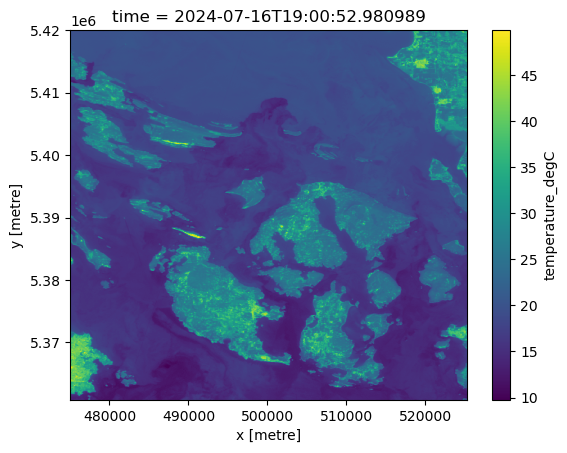

In [34]:
ds['temperature_degC'].plot()

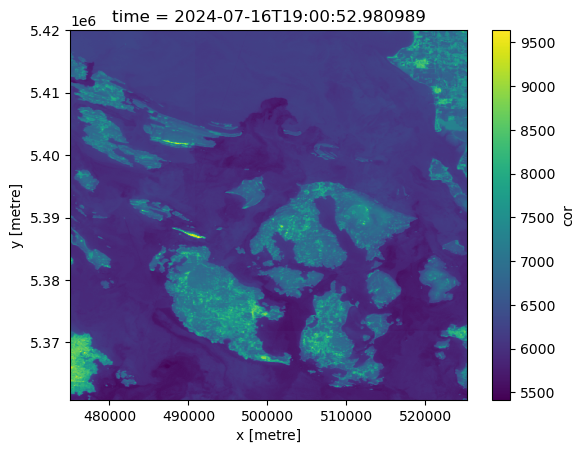

In [54]:
ds['cor'] = ds['trad'] - ds['urad']
ds['cor'].plot()

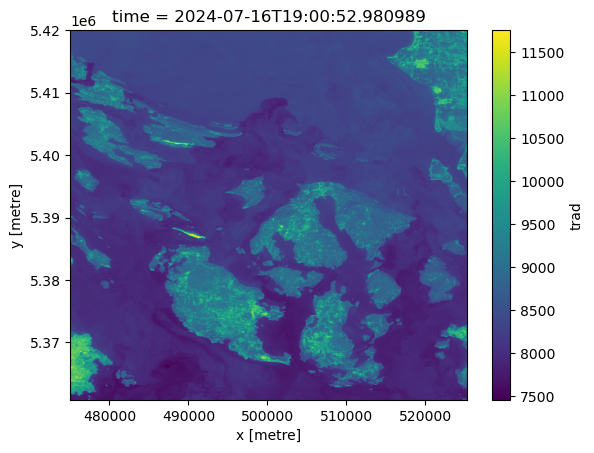

In [50]:
ds['trad'].plot()

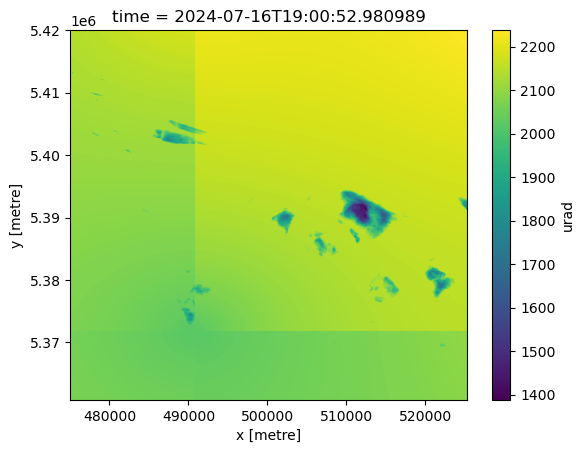

In [35]:
ds['urad'].plot()

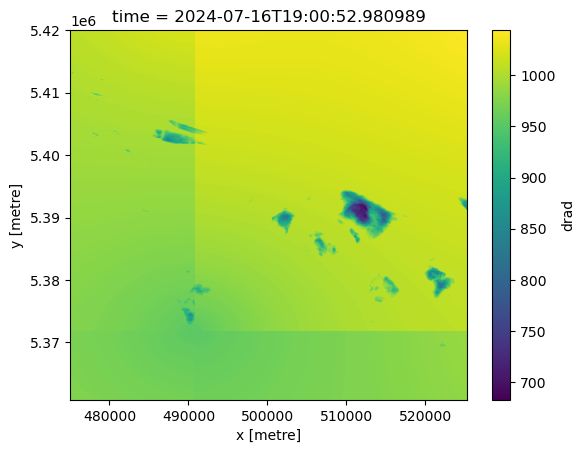

In [36]:
ds['drad'].plot()

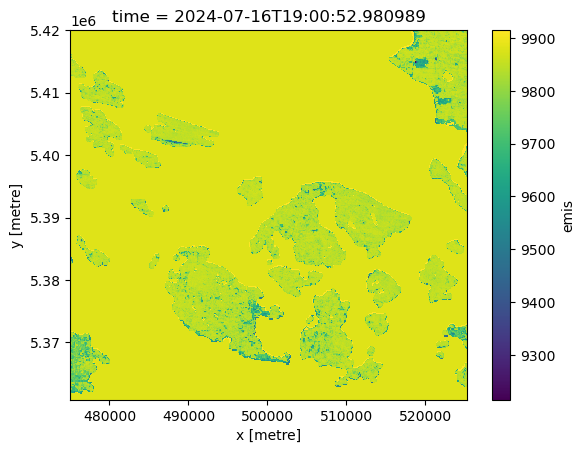

In [37]:
ds['emis'].plot()

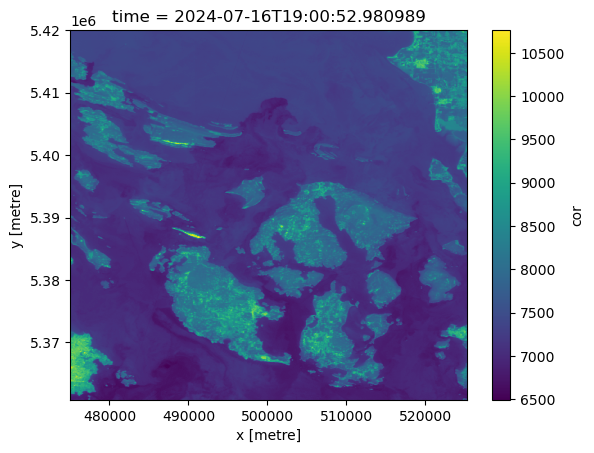

In [ ]:
ds['cor'] = ds['trad'] - ds['drad']
ds['cor'].plot()



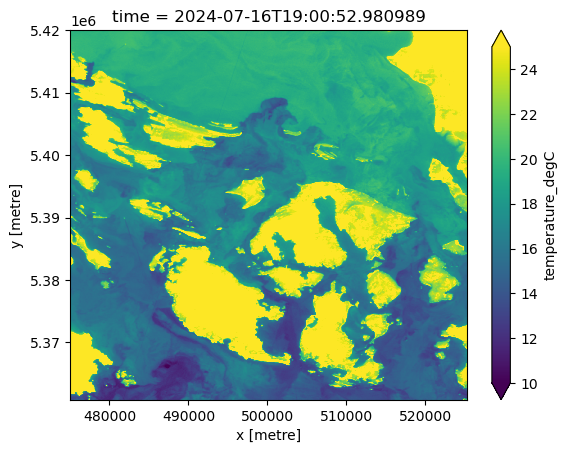

In [44]:
ds['temperature_degC'].plot(vmin = 10, vmax = 25)

# Making SSTs clearer

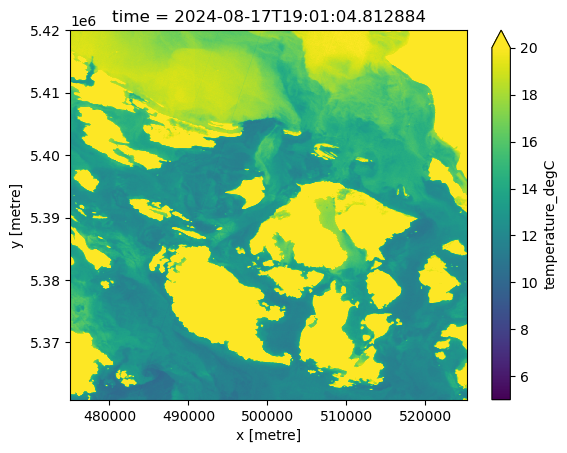

In [14]:
ds['temperature_degC'].plot(cmap='viridis', vmin=5, vmax=20)

# Looking at clouds

In [30]:
# Normalize 3 bands
ds['swir16_normalized'] = ds['swir16'] / np.max(ds['swir16'])
ds['nir08_normalized'] = ds['nir08'] / np.max(ds['nir08'])
ds['blue_normalized'] = ds['blue'] / np.max(ds['blue'])

# Combine bands into an RGB image
rgb_image = np.stack([
    ds['swir16_normalized'].values,
    ds['nir08_normalized'].values,
    ds['blue_normalized'].values
], axis=-1)


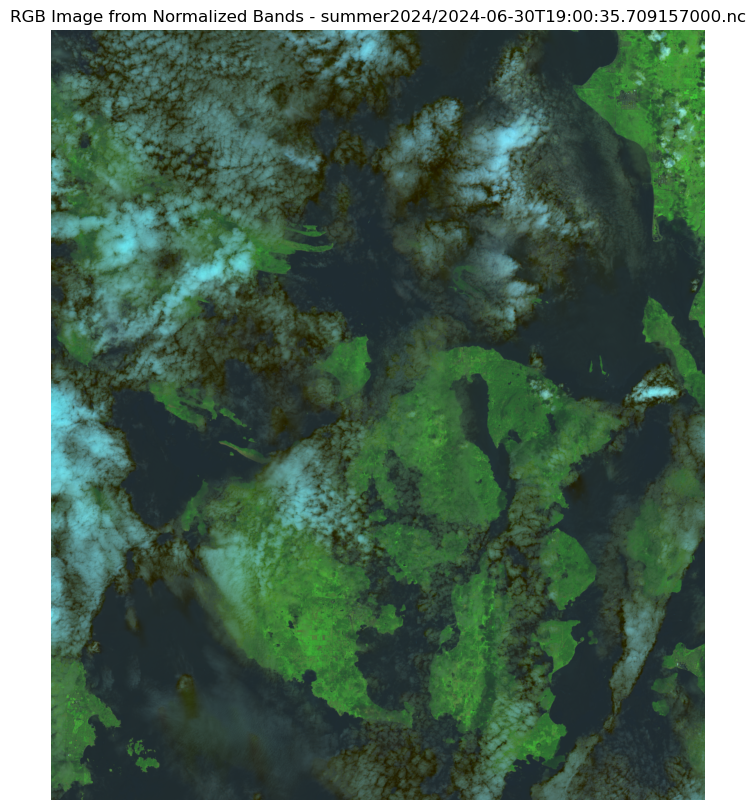

In [31]:
# Plot the RGB image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image)
plt.axis('off')  # Remove axes for better visualization
plt.title("RGB Image from Normalized Bands - " + ds.encoding['source'][32:])
plt.show()

# 